In [30]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import graphviz
from sklearn import tree
# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
1
2
3
4
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [31]:
heart=pd.read_csv('heart.csv')

In [32]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [34]:
heart.isnull().sum()*100/len(heart)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [35]:
heart_target= heart.target

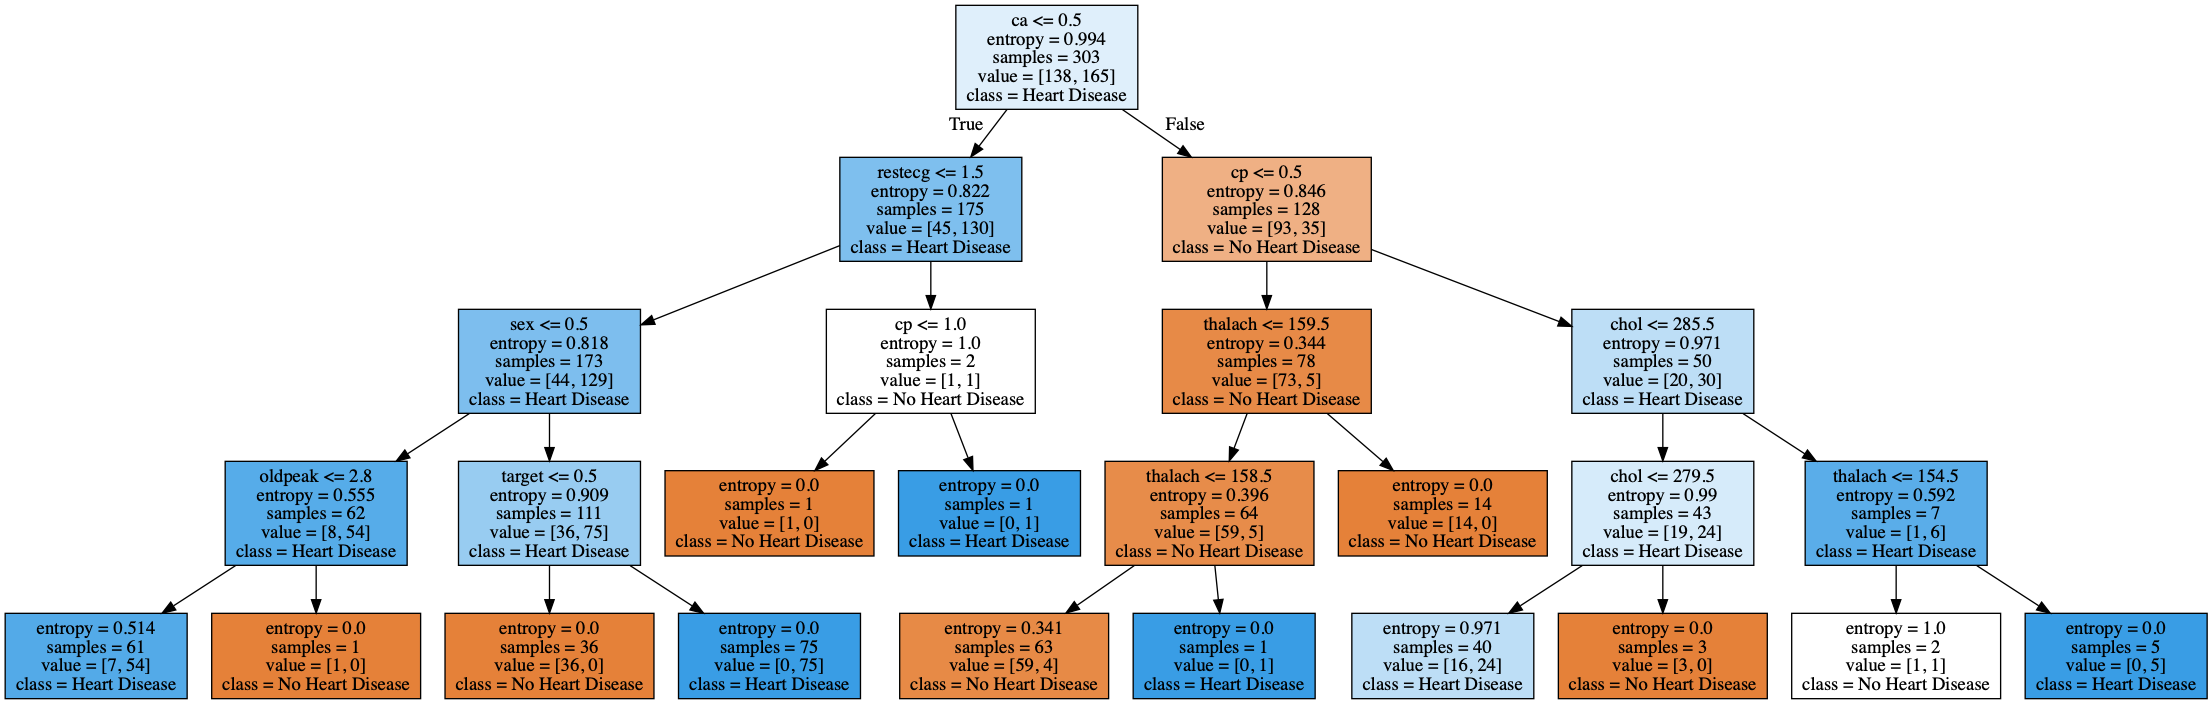

In [67]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1
)
decision_tree.fit(heart, heart_target)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=heart.columns,
    class_names=['No Heart Disease', 'Heart Disease'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [41]:
from sklearn.model_selection import cross_val_score
tree_score = cross_val_score(regressor_tree, X, Y, cv=5)
print('Mean:', tree_score.mean(), '\nVariance:', tree_score.std()*2)

Mean: 0.058428626901187775 
Variance: 0.2337145076047511


In [42]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = heart.drop('target', 1)
Y = heart['target']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.87096774, 0.77419355, 0.87096774, 0.87096774, 0.90322581,
       0.7       , 0.76666667, 0.83333333, 0.68965517, 0.86206897])

In [43]:
import time

In [50]:
# Runtime for tree
start = time.time()

regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=4,
    max_features=3
)

tree_score = cross_val_score(regressor_tree, X, Y, cv=5)

end = time.time()
tree_time = end-start
print(tree_time)

0.040554046630859375


In [51]:
#Runtime for forest

start = time.time()

forest_regression = ensemble.RandomForestClassifier(
    max_depth=4,
    max_features=3
)

forest_score = cross_val_score(forest_regression, X, Y, cv=5)

end = time.time()
forest_time = end-start
print(forest_time)

0.09287095069885254


In [65]:
print ('Forest run time is 2.3 times slower than tree run time')

Forest run time is 2.3 times slower than tree run time
